예제) 대한민국 구석구석에서 사용자에게 입력받은 검색어로 검색하는 코드를 구현하라.

In [19]:
# 대한민국 구석구석
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://korean.visitkorea.or.kr/main/main.do#home'
driver.get(url)
driver.maximize_window() # 웹페이지의 경우 일정 사이즈 이하는 클릭에서 ERROR가 발생할 수 있다. 따라서, 크기를 키워야 한다.
import time
time.sleep(3)
search_bar = driver.find_element_by_id("inp_search")
search_bar.click()
search_bar.send_keys("제주도")
search_bar.send_keys("\n")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11436/2383119399.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11436/2383119399.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")


## Beautiful Soup

#### 1. 현재 페이지에 있는 내용(텍스트)을 화면에 출력하기  

① 현재 페이지가 로딩되는 시간이 걸릴 수도 있기에 대기 시간을 설정한다.  
  
② 현재 페이지의 HTML 전체 (소스) 코드를 모두 지정한다.  
  
③ 위의 HTML 전체 코드를 가지고 온다. (가져오는 행동 = parsing)  
  
예) 
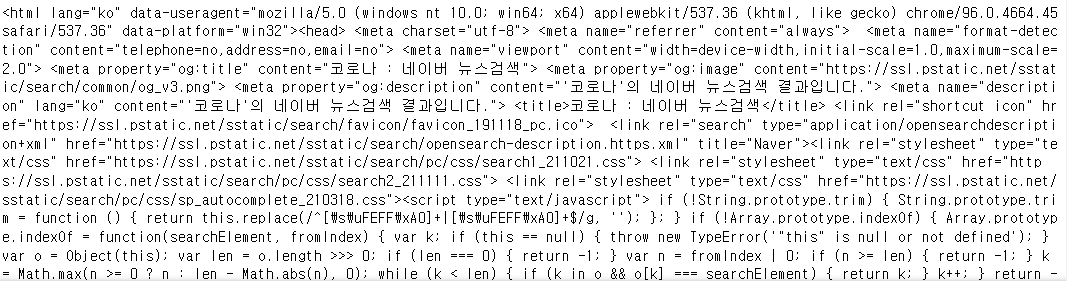
  - soup = 전체 코드
  - html.parser = 'HTML 코드를 가져옴'을 의미  
  
④ 모든 내용을 출력하는 것은 불필요하기 때문에 필요한 부분만 출력한다.  

  - find = 가장 위에 있는 쿼리 하나만 출력 (아래 동명의 쿼리 출력 x)
  - find_all = 동명의 쿼리 모두 출력
  - '출력하고자_하는_class' 자리에 기본적으로 아무것도 지정하지 않을 시 class명을 넣으나, id 등 다른 Tag를 넣을 수 있다.
  - 넣고자 하는 Tag는 id = "id명" 혹은 class_="class명" 등으로 지정한다. (Class는 예약어인데, 이를 변수로 가져오기 위해 ' _ '를 넣음)  
예) 
  
⑤ 변수2를 아래(자손_Tag)에 있는 중에서 필요한 자손 Tag 값을 가진 Tag를 전부 가져온다.

  - 여러개의 동일한 이름의 코드를 가져와야 하기 때문에 find_all 사용한다.
  - 주의: find_all로 tag 값들을 가져오면 list 형태로 저장이 된다.
  - '출력하고자_하는_class' 자리에 기본적으로 아무것도 지정하지 않을 시 class명을 넣으나, id 등 다른 Tag를 넣을 수 있다.
  - 넣고자 하는 Tag는 id = "id명" 혹은 class_="class명" 등으로 지정한다. (Class는 예약어인데, 이를 변수로 가져오기 위해 ' _ '를 넣음)  
  예) 

⑥ 코드로 되어있는 변수3을 for loop을 이용하여 글자(Text)로 전환한다.  
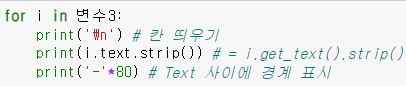
  - get_text() = 코드를 글자(Text)로 바꾸는 것이다.
  - strip() = 공백(space, enter 등) 제거를 의미한다. -> 대부분 공백이 매우 많이 발생하기 때문에 항상 넣어준다.
  - '\n' = 빈칸 띄우기
  - i.text.strip() = i.get_text().strip()
  - for loop 안에서 상세 정보를 추출하려면? i.find('tag_이름','class_명').text.strip()
  - 상세 정보 추출 시, Try/Except를 걸어줘야 하는 이유는? 중간에 보이지 않는 빈 공간이 읽히는 경우도 있는데, 이런 경우 ERROR가 발생한다. 이를 방지하기 위해 사용한다.

In [6]:
# Selenium: 코로나 검색(네이버) 후 News 페이지 클릭하기
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'http://www.naver.com'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("query")  
search_bar.click()
search_bar.send_keys("코로나")
search_bar.send_keys("\n")
news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
news.click()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11576/1110217790.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11576/1110217790.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("query")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11576/1110217790.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")


In [7]:
# 5. 현재 페이지에 있는 내용(텍스트)을 화면에 출력한다.

# ① 현재 페이지가 로딩되는 시간이 걸릴 수도 있기에 대기 시간을 설정한다.
import time
time.sleep(1)

# ② 현재 페이지의 HTML 전체 코드를 모두 지정한다.
full_html = driver.page_source

# ③ 위의 HTML 전체 코드를 가지고 온다. (가져오는 행동 = parsing)
# 변수1 = BeautifulSoup(전체_HTML_코드_변수,'행동_지정')
from bs4 import BeautifulSoup
soup = BeautifulSoup(full_html,'html.parser') # html.parser = HTML 코드를 가져온다.

# ④ 모든 내용을 출력하는 것은 불필요하기 때문에 필요한 부분만 출력한다.
# 변수2 = 변수1.find('tag_이름','출력하고자_하는_Class') 
content_list = soup.find('ul','list_news')

# ⑤ Content_list(변수) 아래(자손_Tag)에 있는 중에서 '<li>' 태그 값을 가진 Tag를 전부 가져온다.
# 변수3 = 변수2.find_all('tag_이름','출력하고자_하는_Class') 
li_list = content_list.find_all('li','bx')
# 여러개의 동일한 이름의 코드를 가져와야 하기 때문에 find_all 사용한다.
# 주의: find_all로 tag 값들을 가져오면 list 형태로 저장이 된다.

# ⑥ 코드로 되어있는 content_list(변수)를 각각 Text()로 전환한다.
for i in li_list:
    print('\n') # 칸 띄우기
    print(i.get_text().strip()) # = i.get_text().strip()
    print('\n')
    print('-'*80) # Text 사이에 경계 표시



문서 저장하기  Keep에 저장 Keep 바로가기  MBC언론사 선정4시간 전네이버뉴스 "코로나19 최초 환자는 中우한 수산시장 노점상"   코로나19 최초 환자는 중국 우한의 화난수산물도매시장에서 일하던 한 노점상이라는 분석 결과가... 시장이 코로나19의 발원지임을 시사한 조사입니다. 월스트리트저널과 뉴욕타임스에 따르면 미국 애리조나대...       SBS언론사 선정1시간 전네이버뉴스 "코로나19 최초 환자, 中 우한 수산시장 노점상"     YTN언론사 선정4시간 전네이버뉴스 "코로나19 최초 환자는 中우한 수산시장 노점상"     뉴시스언론사 선정1시간 전네이버뉴스 "코로나19 최초 확진자, 우한 야생동물시장 노점상"…사이언스저널 실어     조선일보언론사 선정2시간 전네이버뉴스 “코로나 1호 환자는 중국 우한수산시장의 여성 노점상”  관련뉴스 14건 전체보기


--------------------------------------------------------------------------------


문서 저장하기  Keep에 저장 Keep 바로가기  파이낸셜뉴스언론사 선정3시간 전네이버뉴스 대장동 수사팀 코로나 집단감염 전날 16명 단체회식 들통   대장동 개발 의혹을 수사하는 서울중앙지검 전담수사팀이 코로나19 연쇄감염 직전 단체로 저녁 모임을 했던... 이날 저녁 모임을 갖고 난 다음 날 수사팀 내부에선 코로나19 확진자가 연이어 발생했다. 부장검사를 포함해...       뉴스11시간 전네이버뉴스 '대장동 수사팀' 코로나 집단감염 직전 쪼개기 회식     뉴스11시간 전네이버뉴스 檢 대장동 수사팀, 코로나 집단감염 직전 '쪼개기 회식' 논란


--------------------------------------------------------------------------------


문서 저장하기  Keep에 저장 Keep 바로가기  세계일보언론사 선정36분 전네이버뉴스 코로나19 위중증 환자 499명…어제 3034명 신규 

예시) 위 뉴스 중 제목만 추출하라.  
Q1. 'li' 안에서 상세 정보를 퍼 오려면? i.find('tag_이름','class_명').text.strip()  
Q2. Try/Except를 걸어줘야 하는 이유는? 중간에 보이지 않는 빈 공간이 읽히는 경우도 있는데, 이런 경우 ERROR가 발생한다. 이를 방지하기 위해 사용한다.

In [7]:
for i in li_list:
    print('\n')
    print(i.find('a','news_tit').get_text())
    print('\n')
    print('-'*80)



충남도 코로나19 백신 접종 완료율 80% 돌파


--------------------------------------------------------------------------------


유럽, 코로나19 급속 확산에 속속 방역조치 강화


--------------------------------------------------------------------------------


수능 출제위원장 "예년 기조 유지…코로나 학력격차 특이점 없어"


--------------------------------------------------------------------------------


신규확진 3천292명, 코로나19 이후 역대 최다…위중증 506명(종합)


--------------------------------------------------------------------------------


코로나 신규확진자 3292명 '역대 최다'…위중증 506명


--------------------------------------------------------------------------------


코로나 신규 확진 3292명 ‘역대 최다’...위중증 506명


--------------------------------------------------------------------------------


두 번째 '코로나 수능'‥이 시각 시험장


--------------------------------------------------------------------------------


코로나19 신규 확진자 3292명으로 역대 최다 기록


--------------------------------------------------------------------------------


코로나19 신규확진 3292명 '역대 최다'…사망자 29명 발생


---------------------------

실습) 위 뉴스에서 제목/본문내용/언론사/게시시간을 개별 리스트에 저장하시오.

In [11]:
title = []
# 제목
for i in li_list:
    try:
        title.append(i.find('a','news_tit').get_text().strip())
    except:
        continue

contents = []
# 본문내용
for i in li_list:
    try:
        contents.append(i.find('a','api_txt_lines dsc_txt_wrap').get_text().strip())
    except:
        continue

company = []
# 언론사
for i in li_list:
    try:
        company.append(i.find('a','info press').get_text().strip())
    except:
        continue

time = []
# 개시시간
for i in li_list:
    try:
        time.append(i.find('span','info').get_text().strip())
    except:
        continue

print("제목 =", title)
print()
print("본문내용 =", contents)
print()
print("언론사 =", company)
print()
print("게시시간 =", time)

#### 2. 내용 수집한 것을 TEXT(txt) 파일로 저장하기  

① 출력 값을 메모장으로 넣기 위해 표준 출력을 임의로 지정하기
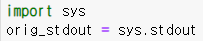
- stdout = standard output (최종 결과물)  
- 표준 입출력
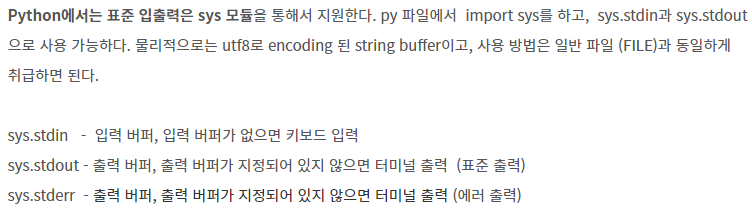

② 메모장 경로 지정 후 열기  
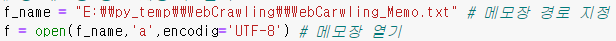
- 메모장 경로 지정: '\\' 하나 더 추가하여 '\\\\' 만들기
- 메모장에 내용을 추가할 것임을 선언: 'a'
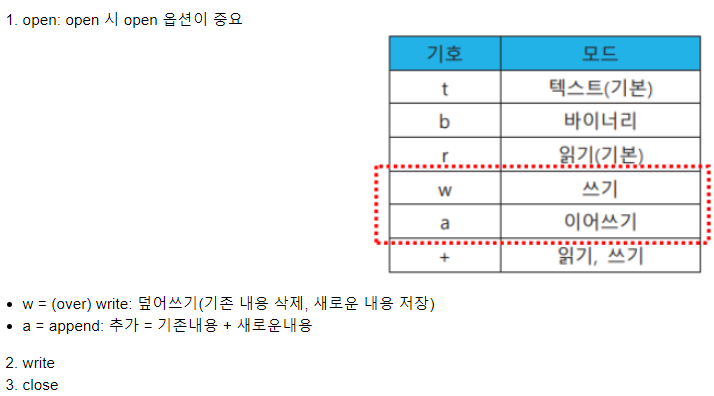
- Encoding: 컴퓨터가 이용하는 신호를 문자/숫자로, 혹은 그 반대로 변환하는 것이다. ASCII(아스키코드), UTF-8, EUC-KR, cp949 등 다양한 문자 인코딩 방법이 있다. 국제 표준으로 ASCII가 있으나, 일반적으로 UTF-8을 많이 사용한다.
- Encoding을 미리 지정하는 이유는 메모장과 프로그램의 Encoding이 다를 경우 결과가 깨질 수 있기 때문이다.

③ 최종 결과물을 메모장에 넣을 것을 지정하기  

- 원래 결과 값을 하단에 출력되는데, 이를 메모장에 넣을 것을 지정한다.

④ list에 있는 내용들을 추출하여 메모장에 넣기  
예) 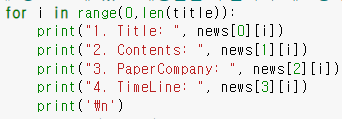
- 표준 출력(stdout)이 메모장에 넣을 것으로 지정했기에 print()값이 메모장에 입력된다.

⑤ 메모장에 결과를 출력하던 것을 기존 하단 출력으로 돌리기 (원래대로)  


⑥ 메모장 닫기  


In [12]:
news=[title,contents,company,time]

In [17]:
# 5. 내용 수집한 것을 TEXT(txt) 파일로 저장한다.

# ① 출력 값을 메모장으로 넣기 위해 표준 출력을 임의로 지정하기
import sys
orig_stdout = sys.stdout
# stdout = standard output (최종 결과물)

# ② 메모장 경로 지정 후 열기
f_name = "E:\\py_temp\\WebCrawling\\WebCarwling_Memo.txt" # 메모장 경로 지정
f = open(f_name , 'a' , encoding='UTF-8') # 메모장 열기 

# ③ 최종 결과물을 메모장에 넣을 것을 지정하기
sys.stdout = f
# 원래 결과 값을 하단에 출력되는데 이를 메모장에 넣기 위해 표준 출력을 지정한다.

# ④ list에 있는 내용들을 추출하여 메모장에 넣기
for i in range(0,len(title)):
    print("1. Title: ", news[0][i])
    print("2. Contents: ", news[1][i])
    print("3. PaperCompany: ", news[2][i])
    print("4. TimeLine: ", news[3][i])
    print('\n')
# 표준 출력(stdout)이 메모장에 넣을 것으로 지정했기에 print()값이 메모장에 입력된다.

# ⑤ 기존 하단 출력으로 돌리기 (원래대로)
sys.stdout = orig_stdout

# ⑥ 메모장 닫기
f.close()

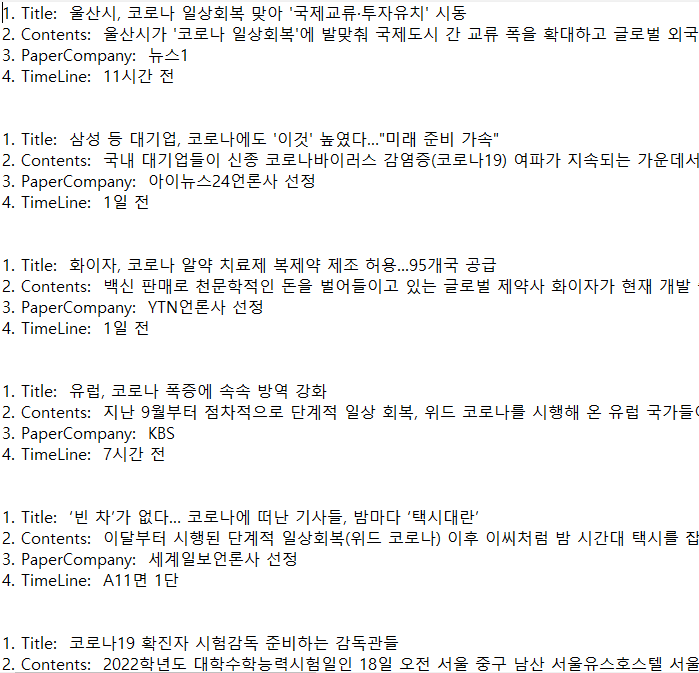

In [11]:
# Another Method

# 리스트 선언
title_list = []
contents_list = []
company_list = []
time_list = []

# 각 내용 추출
for i in li_list:
    try:
        title = i.find('a','news_tit').get_text().strip()
    except:
        continue
    else:
        # 각 변수 명으로 추출
        contents = i.find('a','api_txt_lines dsc_txt_wrap').get_text().strip()
        company = i.find('a','info press').get_text().strip()
        time = i.find('span','info').get_text().strip()
        # 각 리스트에 저장
        title_list.append(title)
        contents_list.append(contents)
        company_list.append(company)
        time_list.append(time)

실습) 10 페이지 넘기기

In [8]:
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'http://www.naver.com'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("query")  
search_bar.click()
search_bar.send_keys("코로나")
search_bar.send_keys("\n")
news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
news.click()
# Click 여러번하기
for i in range(0,9):
    page = driver.find_element_by_xpath("//*[@id='main_pack']/div[2]/div/a[2]") # 매순간 지정해야 click() 여러번 가능
    page.click() # element는 지정하고 click() 한번하면 버리기 때문에 값을 매번 지정해야 한다.
    time.sleep(1)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5224/375901970.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5224/375901970.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("query")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5224/375901970.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5224/375901970.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_xpath("//*[@id='main_pack']/div[2]/div/a[2]") # 매순간 지정해야 click() 여러번 가능


In [1]:
# Click 여러번하기 - 두번째 방법
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'http://www.naver.com'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("query")  
search_bar.click()
search_bar.send_keys("코로나")
search_bar.send_keys("\n")
news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")
news.click()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9344/642401222.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9344/642401222.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("query")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9344/642401222.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  news = driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a")


In [ ]:
# 잘못된 방법
for i in range(1,5):
    page = driver.find_element_by_xpath("//*[@id='main_pack']/div[2]/div/div/a[%s]" %i) # %s가 index 번호이다.
    page.click()
    time.sleep(1)
# page 6부터는 index가 달라지기 때문에 의도와 다른 위치에 도달할 것이다.

In [5]:
# Link_text 이용하기
for i in range(1,11):
    page = driver.find_element_by_link_text(str(i))
    page.click()
    time.sleep(1)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9344/3900505370.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_link_text(str(i))


** Link_text: 해당 링크의 text(이름)을 의미한다.
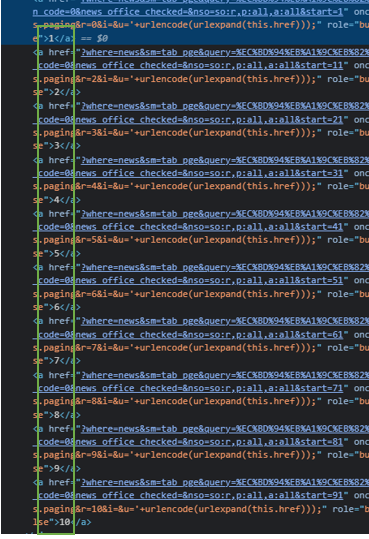